In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import datasets, models, layers, optimizers, activations, Model

Mostra versão do keras e do tensorflow que está sendo utilizado:

```python
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
```

### **Splitting data (train, test and validation)**

In [2]:
(x_aux_train, y_aux_train), (x_test, y_test) = datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_aux_train, y_aux_train)

### **Preprocessing** 

In [3]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_val   = x_val.reshape(x_val.shape[0],-1)
x_test  = x_test.reshape(x_test.shape[0],-1)

In [4]:
# instancia o encoder
hot = OneHotEncoder()

# aplica a transformação aos targets
y_hot_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_hot_val   = hot.fit_transform(y_val.reshape(-1, 1)).toarray()
y_hot_test  = hot.fit_transform(y_test.reshape(-1, 1)).toarray()


x_norm_train = StandardScaler().fit_transform(x_train)
x_norm_val   = StandardScaler().fit_transform(x_val)
x_norm_test  = StandardScaler().fit_transform(x_test)

### **Modeling** 

#### **Assembly** 

In [5]:
## Passando uma lista de layers
#model = models.Sequential([layers.Dense(25,  activation=activations.relu,   name="hidden1", input_dim = 784),
#                           layers.Dense(25,  activation=activations.relu,   name="hidden2"),
#                           layers.Dense(10,  activation=activations.softmax,name="output"),
#                          ])
model = models.Sequential()

model.add(layers.Dense(25, activation="relu", name="hidden1",  input_dim = 784))
model.add(layers.Dense(25, activation="relu", name="hidden2"))
model.add(layers.Dense(10, activation="softmax", name="output"))

Outras formas de utilizar a API do keras que te dão mais flexibilidade:

- Adicionando layer com o método ```add```:

```python
model = models.Sequential()

model.add(layers.Dense(25, activation="relu", name="hidden1"  input_dim = 784))
model.add(layers.Dense(25, activation="relu", name="hidden2"))
model.add(layers.Dense(10, activation="softmax", name="output"))
```

#### **Compiling**

In [6]:
model.compile(loss = 'categorical_crossentropy', 
                     metrics=["accuracy"],
                     optimizer = optimizers.Adam())

#### **Training** 

In [7]:
history = model.fit(x_norm_train, 
                   y_hot_train, 
                   epochs = 10, 
                   verbose = 1,
                   validation_data = (x_norm_test, y_hot_test),)

Train on 45000 samples, validate on 10000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 66us/sample - loss: 0.3889 - accuracy: 0.8847 - val_loss: 0.2036 - val_accuracy: 0.9405
Epoch 2/10
45000/45000 [==============================] - 3s 59us/sample - loss: 0.1776 - accuracy: 0.9495 - val_loss: 0.1758 - val_accuracy: 0.9484
Epoch 3/10
45000/45000 [==============================] - 3s 60us/sample - loss: 0.1352 - accuracy: 0.9593 - val_loss: 0.1612 - val_accuracy: 0.9559
Epoch 4/10
45000/45000 [==============================] - 3s 58us/sample - loss: 0.1143 - accuracy: 0.9653 - val_loss: 0.1581 - val_accuracy: 0.9556
Epoch 5/10
45000/45000 [==============================] - 3s 60us/sample - loss: 0.0964 - accuracy: 0.9699 - val_loss: 0.1591 - val_accuracy: 0.9570
Epoch 6/10
45000/45000 [==============================] - 3s 61us/sample - loss: 0.0853 - accuracy: 0.9731 - val_loss: 0.1778 - val_accuracy: 0.9538
Epoch 7/10
45000/45000 [==============================] 

### **Inspect model** 

In [19]:
model.layers

In [25]:
fst_layer      = model.layers[0]
fst_layer_name = fst_layer.name
print(f"Primeiro layer: {fst_layer_name}\n")

print(model.get_layer(fst_layer_name))

Primeiro layer: hidden1



In [28]:
weights, biases = fst_layer.get_weights()

In [35]:
print(f"Weights shapes:{weights.shape} Biases shapes: {biases.shape}")

Weights shapes:(784, 25) Biases shapes: (25,)


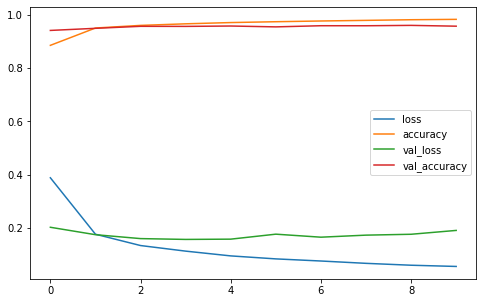

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.show()

#### **Results**

In [10]:
y_train_pred = model.predict_classes(x_norm_train)
y_val_pred = model.predict_classes(x_norm_val)
y_test_pred = model.predict_classes(x_norm_test)

In [12]:
print("TREINO:")
print(classification_report(y_train_pred, y_train))

TREINO:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4542
           1       1.00      0.99      0.99      5051
           2       0.99      0.99      0.99      4505
           3       0.98      0.98      0.98      4579
           4       0.99      0.99      0.99      4364
           5       0.99      0.98      0.98      4142
           6       0.98      1.00      0.99      4362
           7       0.99      0.99      0.99      4645
           8       0.98      0.99      0.99      4364
           9       0.98      0.98      0.98      4446

    accuracy                           0.99     45000
   macro avg       0.99      0.99      0.99     45000
weighted avg       0.99      0.99      0.99     45000



In [14]:
print("VALIDATION:")
print(classification_report(y_val_pred, y_val))

VALIDATION:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1431
           1       0.98      0.97      0.98      1752
           2       0.95      0.96      0.95      1451
           3       0.95      0.95      0.95      1542
           4       0.95      0.96      0.96      1482
           5       0.96      0.93      0.94      1371
           6       0.97      0.98      0.97      1485
           7       0.95      0.97      0.96      1566
           8       0.94      0.95      0.94      1458
           9       0.94      0.94      0.94      1462

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [15]:
print("TEST:")
print(classification_report(y_test_pred, y_test))

TEST:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1001
           1       0.99      0.97      0.98      1159
           2       0.95      0.96      0.95      1022
           3       0.95      0.94      0.94      1031
           4       0.96      0.95      0.96       986
           5       0.95      0.94      0.94       908
           6       0.96      0.97      0.97       949
           7       0.94      0.96      0.95      1003
           8       0.93      0.96      0.95       942
           9       0.94      0.95      0.94       999

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [16]:
(loss, metric) = model.evaluate(x_norm_test, y_hot_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.1918 - accuracy: 0.9564
